<div class="markdown-google-sans">

## Aprendizaje automático
</div>

Colab te permite importar un conjunto de datos de imágenes, entrenar un clasificador de imágenes en él y evaluar el modelo con solo <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">unas pocas líneas de código</a>. Los notebooks de Colab ejecutan código en los servidores alojados en la nube de Google, lo que significa que puedes aprovechar al máximo el hardware de Google, incluidas las <a href="#using-accelerated-hardware">GPU y TPU</a>, independientemente de la potencia de tu máquina. Lo único que necesitas es un navegador.

In [ ]:
# install dlib (will take 10 or more minutes)
!apt update
!apt install -y cmake
!pip install dlib

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Building dependency tree       
Reading state infor

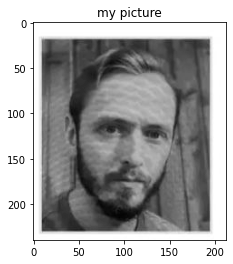

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import dlib

img = cv2.imread('/content/imagen2.jpg', 0)

plt.imshow(img, cmap = 'gray')
plt.title('my picture')
plt.show()

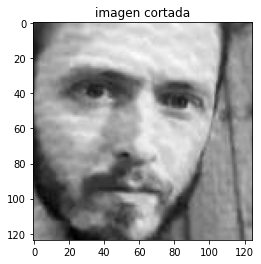

In [ ]:
face_detector = dlib.get_frontal_face_detector()

copy_img = img
coordinates_bboxes = face_detector(copy_img)
for c in coordinates_bboxes:
  x_ini, y_ini, x_fin, y_fin = c.left(), c.top(), c.right(), c.bottom()

img_cortada = copy_img[y_ini:y_fin, x_ini:x_fin]
cv2.imwrite('/content/img_cortada.jpg', img_cortada)
plt.imshow(img_cortada, cmap = "gray")
plt.title('imagen cortada')
plt.show()


# Para la parte de la red neuronal

In [ ]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

--2022-12-01 01:35:35--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/nilt43hyl1dx82k/dataset.zip [following]
--2022-12-01 01:35:35--  https://www.dropbox.com/s/raw/nilt43hyl1dx82k/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce83159138a0eb60850b93963c4.dl.dropboxusercontent.com/cd/0/inline/Bxze-DcnYaE6wm13oFNppJqy3mNmuiD_kt3NJAhF9x7Rl5fo-OzeP_3tkIMWeJN1zYaLw5RtfbfAKnf32ioELPaAXCRg5zsIKtogbFwGbSnQDjxHrluo-UBvsblpaBcmct9LxOYZ-M-vLrIbR6jd9UMIiqSAx0GZItyKKm6IHIyH5Q/file# [following]
--2022-12-01 01:35:36--  https://uce83159138a0eb60850b93963c4.dl.dropboxusercontent.com/cd/0/inline/Bxze-DcnYaE6wm13oFNppJqy3mNmuiD_kt3NJAhF9x7Rl5fo-OzeP_3tkIMWeJN1zYaLw5RtfbfAKn

In [ ]:
!unzip train.zip
!unzip valid.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: train/Happy/people_Happy_8.jpg  
  inflating: train/Happy/people_Happy_80.jpg  
  inflating: train/Happy/people_Happy_800.jpg  
  inflating: train/Happy/people_Happy_801.jpg  
  inflating: train/Happy/people_Happy_802.jpg  
 extracting: train/Happy/people_Happy_803.jpg  
 extracting: train/Happy/people_Happy_804.jpg  
  inflating: train/Happy/people_Happy_805.jpg  
  inflating: train/Happy/people_Happy_806.jpg  
  inflating: train/Happy/people_Happy_807.jpg  
  inflating: train/Happy/people_Happy_808.jpg  
  inflating: train/Happy/people_Happy_809.jpg  
  inflating: train/Happy/people_Happy_81.jpg  
 extracting: train/Happy/people_Happy_810.jpg  
  inflating: train/Happy/people_Happy_811.jpg  
  inflating: train/Happy/people_Happy_812.jpg  
  inflating: train/Happy/people_Happy_813.jpg  
  inflating: train/Happy/people_Happy_814.jpg  
  inflating: train/Happy/people_Happy_815.jpg  
  inflating: train/Happy/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model # Probablemente usemos el modelo secuencial
from keras.preprocessing.image import ImageDataGenerator # Para data augmentation
from tensorflow.keras.utils import img_to_array # Conversion a numpy array
from tensorflow.keras.utils import load_img # cargar una imagen
from keras.applications.mobilenet import MobileNet, preprocess_input # CNN: Modelo de clasificacion de imagenes, probablemente pre entrenado con ImageNet, preproceso de cada canal
from keras.losses import categorical_crossentropy # Pérdida de información

In [ ]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [ ]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train", 
                                               target_size=(224,224), 
                                               batch_size=32
                                  )


train_data.class_indices

Found 7007 images belonging to 7 classes.


{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/valid", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 1764 images belonging to 7 classes.


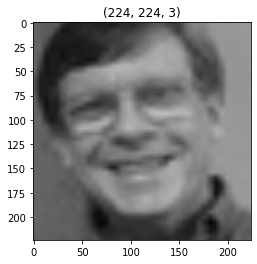

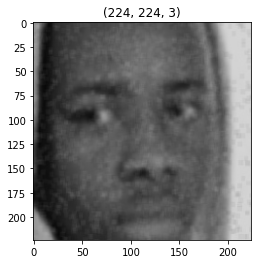

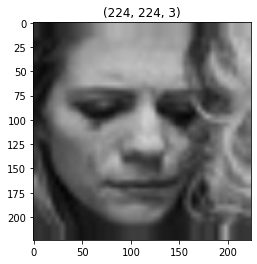

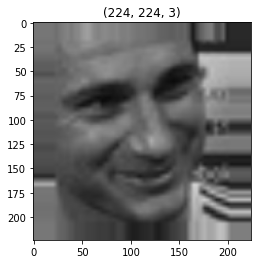

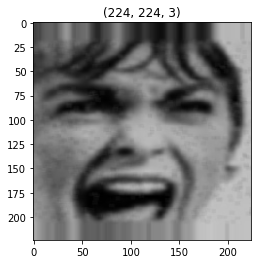

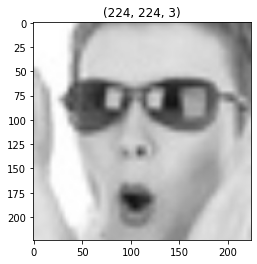

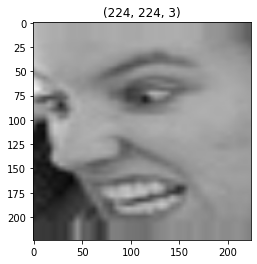

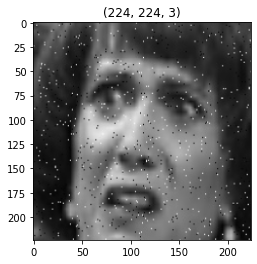

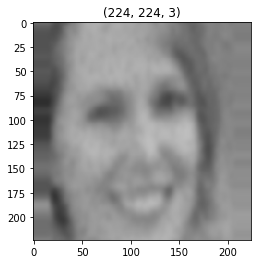

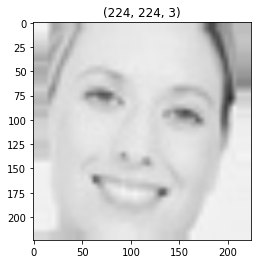

In [ ]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

In [ ]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [ ]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 20, 
                           validation_data= val_data, 
                           validation_steps= 8)

<ipython-input-13-19fe34a6fc2f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/8
10/10 [==============================] - 31s 3s/step - loss: 3.6644 - accuracy: 0.5375 - val_loss: 7.0972 - val_accuracy: 0.3242
Epoch 2/8
10/10 [==============================] - 24s 2s/step - loss: 3.4195 - accuracy: 0.5750 - val_loss: 7.1231 - val_accuracy: 0.3281
Epoch 3/8
10/10 [==============================] - 27s 3s/step - loss: 4.7132 - accuracy: 0.4812 - val_loss: 6.4748 - val_accuracy: 0.3711
Epoch 4/8
10/10 [==============================] - 24s 2s/step - loss: 3.6543 - accuracy: 0.5469 - val_loss: 7.1622 - val_accuracy: 0.2695
Epoch 5/8
10/10 [==============================] - 28s 3s/step - loss: 3.0010 - accuracy: 0.5969 - val_loss: 6.9665 - val_accuracy: 0.2852
Epoch 6/8
10/10 [==============================] - 24s 2s/step - loss: 3.1489 - accuracy: 0.5875 - val_loss: 7.6665 - val_accuracy: 0.3281
Epoch 7/8
10/10 [==============================] - 24s 2s/step - loss: 4.0427 - accuracy: 0.5250 - val_loss: 6.4663 - val_accuracy: 0.3945
Epoch 8/8
10/10 [==========

In [ ]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

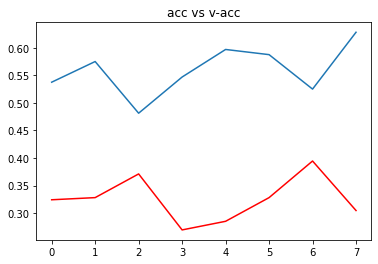

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

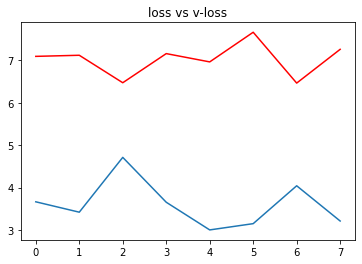

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 0s 66ms/step
 the image is of Sad


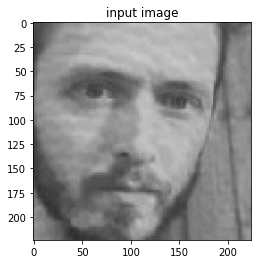

In [ ]:
# path for the image to see if it predics correct class

path = "/content/img_cortada.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()